<a href="https://colab.research.google.com/github/moganakumaran/Complete-Python-3-Bootcamp/blob/master/Feature_Selection_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Selection Assignment 1**

1. Use the Hotel Booking dataset which is shared already as the data
2. Run correlation on the variables & prepare the plot for the same.
3. Repeat Step 2 with Normalized variables (Based on our previous session's understanding)
4. Use custom code to filter variables that are greater than threshold value of correlation


In [0]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [0]:
hotel=pd.read_csv('hotel_bookings1.csv')

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [0]:
 corrmat = hotel.corr()

In [9]:
corrmat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


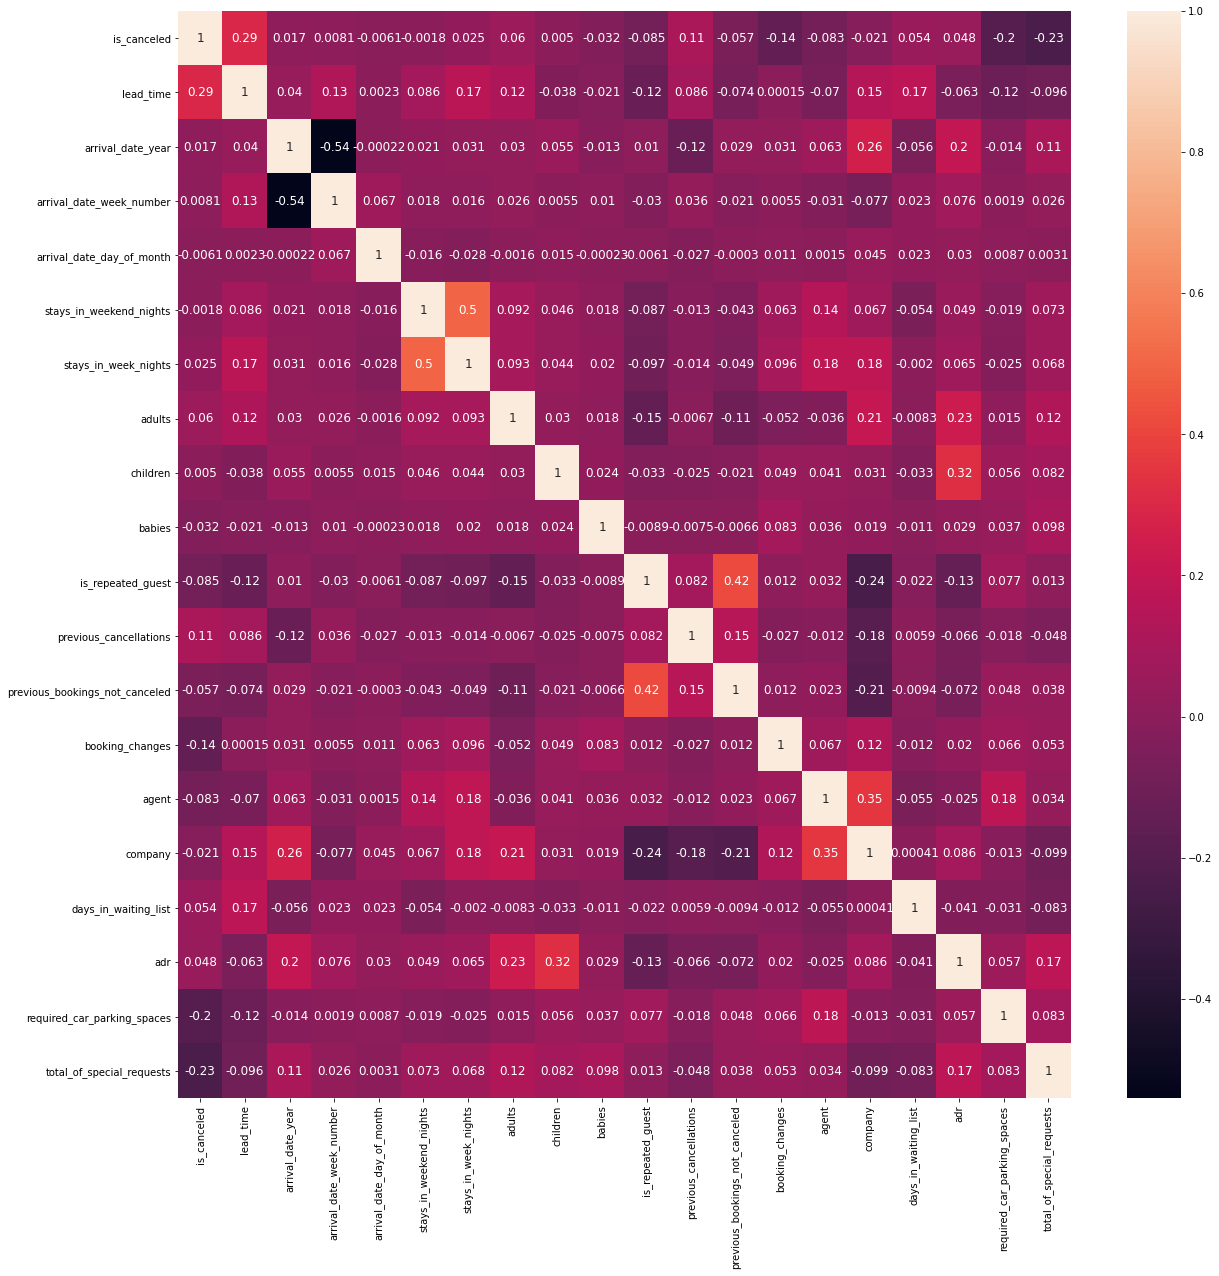

In [31]:

fig, ax = plt.subplots(figsize = (20,20 ))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})


**Feature Selection Assignment 1**
Run correlation with Normalized variables 



In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#selecting only desired columns-- but run correlation to identify
temp=hotel.iloc[:,[0,1,12,13,14,15]]



In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp['hotel'] = label_encoder.fit_transform(temp['hotel'])
temp['meal'] = label_encoder.fit_transform(temp['meal'])
temp['country'] = temp['country'].astype(str)
temp['country'] = label_encoder.fit_transform(temp['country'])
temp['distribution_channel'] = temp['distribution_channel'].astype(str)
temp['distribution_channel'] = label_encoder.fit_transform(temp['distribution_channel'])
temp['market_segment'] = temp['market_segment'].astype(str)
temp['market_segment'] = label_encoder.fit_transform(temp['market_segment'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [0]:
X = temp.drop('is_canceled',axis=1)
y = temp['is_canceled']

In [0]:
scaler=StandardScaler()

In [58]:
scaler.fit_transform(temp)

array([[ 1.40722407, -0.76704049, -0.52006829,  0.92786584, -1.52212079,
        -1.74676299],
       [ 1.40722407, -0.76704049, -0.52006829,  0.92786584, -1.52212079,
        -1.74676299],
       [ 1.40722407, -0.76704049, -0.52006829, -0.76456667, -1.52212079,
        -1.74676299],
       ...,
       [-0.71061889, -0.76704049, -0.52006829, -1.12086825,  0.84620013,
         0.45691357],
       [-0.71061889, -0.76704049, -0.52006829, -0.76456667,  0.84620013,
         0.45691357],
       [-0.71061889, -0.76704049,  1.3515505 , -1.12086825,  0.84620013,
         0.45691357]])

In [57]:
temp.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel
0,1,0,0,135,3,1
1,1,0,0,135,3,1
2,1,0,0,59,3,1
3,1,0,0,59,2,0
4,1,0,0,59,6,3


In [0]:
cormat_std=temp.corr()

In [60]:
cormat_std

,hotel,is_canceled,meal,country,market_segment,distribution_channel
hotel,1.000000,-0.136531,-0.008018,0.050807,-0.083795,-0.174419
is_canceled,-0.136531,1.000000,-0.017678,0.264223,0.059338,0.167600
meal,-0.008018,-0.017678,1.000000,-0.089951,0.145132,0.116957
country,0.050807,0.264223,-0.089951,1.000000,-0.273592,-0.135707
market_segment,-0.083795,0.059338,0.145132,-0.273592,1.000000,0.767751
distribution_channel,-0.174419,0.167600,0.116957,-0.135707,0.767751,1.000000


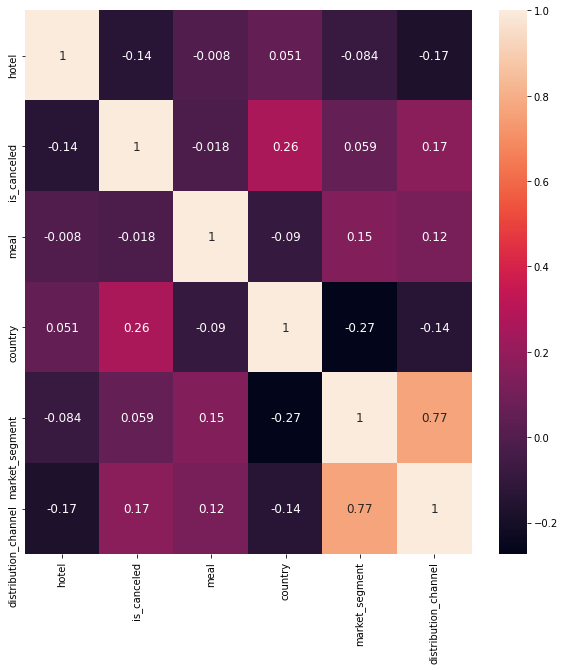

In [61]:
fig, ax = plt.subplots(figsize = (10,10 ))
sns.heatmap(cormat_std, annot = True, annot_kws={'size': 12})

Use custom code to filter variables that are greater than threshold value of **correlation** **bold text**

In [0]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [64]:
threshold = 0.20
corr_value = getCorrelatedFeature(cormat_std['is_canceled'], threshold)
corr_value

,Corr Value
is_canceled,1.000000
country,0.264223
